# **Задание 2. Гершбаум С.**
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Изучим, где больше люди пьют разные виды алкогольных напитков. Для каждой из стран представлены стандартные размеры порций, которые были получены путем пересчета из среднего содержания алкоголя и среднего размера порции для каждого напитка.

In [8]:
data_main = pd.read_csv('/content/drinks.csv')

df = data_main.copy()
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


В датасете имеются следующие данные:
- **`country`** - страна
- **`beer_servings`** - количество порций пива, выпитых на человека
- **`spirit_servings`** - количество порций крепких алкогольных напитков, выпитых на человека
- **`wine_servings`** - количество порций вина, выпитых на человека
- **`total_litres_of_pure_alcohol`** - суммарное количество литров чистого спирта

Результаты показывают, сколько бокалов вина, банок пива и шотов крепких напитков было выпито на человека в каждой стране в 2010 году.

In [10]:
# отсортируем страны по количеству порций каждого вида алкоголя
countries_beer = df.sort_values(by='beer_servings', ascending=False)[['country', 'beer_servings']]
countries_spirit = df.sort_values(by='spirit_servings', ascending=False)[['country', 'spirit_servings']]
countries_wine = df.sort_values(by='wine_servings', ascending=False)[['country', 'wine_servings']]
countries_pure_alcohol = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)[['country', 'total_litres_of_pure_alcohol']]

# выведем полученный результат в виде датафрейма
top_alcohol_countries = pd.DataFrame(
    {
    'Top by beer consumption': countries_beer['country'].values,
    'Beer servings': countries_beer['beer_servings'].values,
    'Top by spirits consumption': countries_spirit['country'].values,
    'Spirit servings': countries_spirit['spirit_servings'].values,
    'Top by wine consumption': countries_wine['country'].values,
    'Wine servings': countries_wine['wine_servings'].values,
    'Top by consumption of pure alcohol': countries_pure_alcohol['country'].values,
    'Litres of pure alcohol': countries_pure_alcohol['total_litres_of_pure_alcohol'].values
    }
)

top_alcohol_countries.head(10)

,Top by beer consumption,Beer servings,Top by spirits consumption,Spirit servings,Top by wine consumption,Wine servings,Top by consumption of pure alcohol,Litres of pure alcohol
0,Namibia,376,Grenada,438,France,370,Belarus,14.4
1,Czech Republic,361,Belarus,373,Portugal,339,Lithuania,12.9
2,Gabon,347,Haiti,326,Andorra,312,Andorra,12.4
3,Germany,346,Russian Federation,326,Switzerland,280,Grenada,11.9
4,Lithuania,343,St. Lucia,315,Denmark,278,Czech Republic,11.8
5,Poland,343,Guyana,302,Slovenia,276,France,11.8
6,Venezuela,333,Slovakia,293,Luxembourg,271,Russian Federation,11.5
7,Ireland,313,Dominica,286,Croatia,254,Ireland,11.4
8,Palau,306,Thailand,258,Italy,237,Slovakia,11.4
9,Romania,297,Cook Islands,254,Equatorial Guinea,233,Luxembourg,11.4


Намибия - лидер по потреблению пива в мире, там за год человек в среднем выпивает 376 банок. Габон занимает 3-е место с 347-ю банками пива на человека. Я всегда знал, что меня тянет на юго-запад Африки... Чехи и немцы - в топ-4. По потреблению крепких спиртных напитков лидирует Гренада с населением в 115 тыс. человек - в среднем 438 порций. Видимо, ром там популярен как нигде (но с популяростью водки в России конкурировать сложно). По потреблению вина мы и не могли сомневаться - Франция во главе с 370-ю бокалами вина на человека, а следом Португалия - 339 бокалов.

Выделим топ-5 стран по потреблению чистого спирта в литрах и покажем графически потребление каждого вида алкогольных напитков для этих пяти стран.

In [11]:
df_sorted = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(5).reset_index(drop=True)

df_sorted

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Belarus,142,373,42,14.4
1,Lithuania,343,244,56,12.9
2,Andorra,245,138,312,12.4
3,Grenada,199,438,28,11.9
4,Czech Republic,361,170,134,11.8


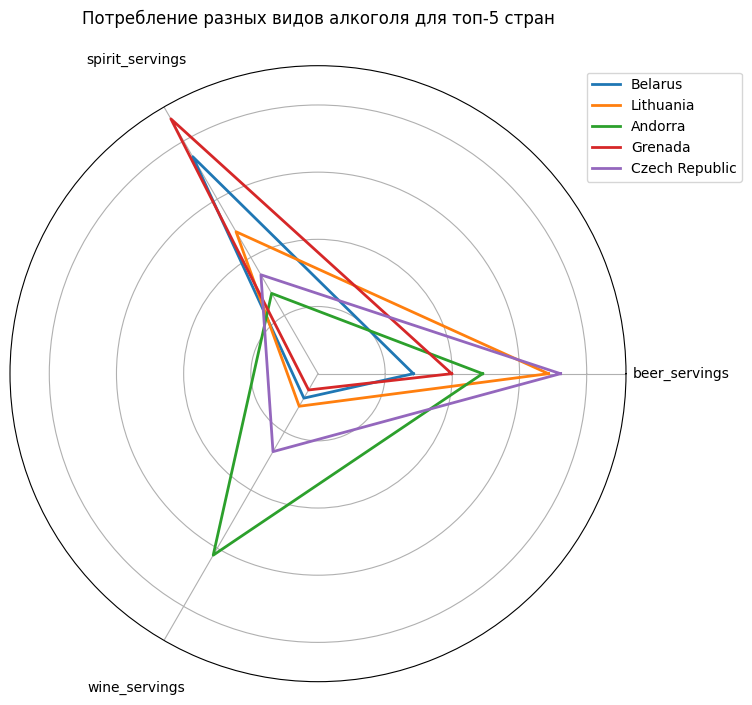

In [12]:
categories = ['beer_servings', 'spirit_servings', 'wine_servings']

# зададим углы для графика, будем строить его в полярных координатах
angles = np.linspace(0, 2 * np.pi, 3, endpoint=False).tolist()

# замкнем круг
angles += angles[:1]

# строим сам график
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# строим "линии" по категориям для каждой из стран
for i, row in df_sorted.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row['country'])

# поработаем с осями и их расположением
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.tick_params(axis='x', pad=29)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Потребление разных видов алкоголя для топ-5 стран', pad=30)
plt.show()

Видим, что "по крепким напиткам" лидируют Гренада и Беларусь, "по пиву" - Литва, а "по вину" - Франция и Андорра.